(822, 1514) 116 0


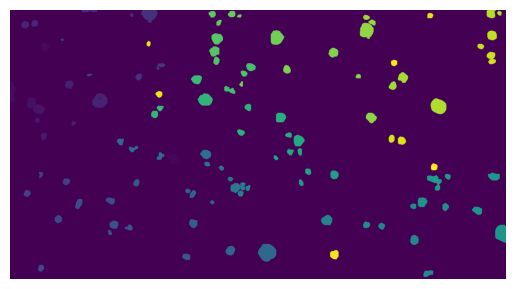

In [1]:
# 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import skimage
img_path = r'sample_imgs\organoid_in_droplet\1+1%+1%pluronic-after pippet.tif'
mask_path = r'sample_imgs\organoid_in_droplet\1+1%+1%pluronic-after pippet_cp_masks.png'
mask = skimage.io.imread(mask_path)
plt.imshow(mask)
plt.axis('off')
print(mask.shape, mask.max(), mask.min())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.372738751277364].


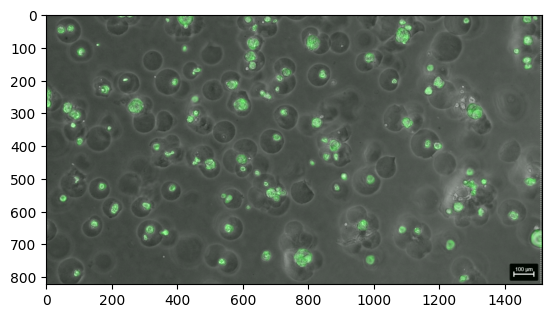

In [3]:
# synthetic oragnoid fluorescent signals 
from perlin_numpy import generate_perlin_noise_2d
res = 100
fluor = generate_perlin_noise_2d((1600,1600), (res,res))[:mask.shape[0], :mask.shape[1]]
fluor = (fluor - fluor.min()) / ( fluor.max() - fluor.min())
fluor[mask==0]=0
fluor += np.random.uniform(0, 0.1, mask.shape)
fluor = skimage.filters.gaussian(fluor, 2)
plt.imshow(fluor, cmap='gray')

img = skimage.io.imread(img_path, as_gray=True)
img = skimage.color.gray2rgb(img)
img[:,:,1] += (fluor*0.5)

plt.imshow(img, )

<Axes: ylabel='Count'>

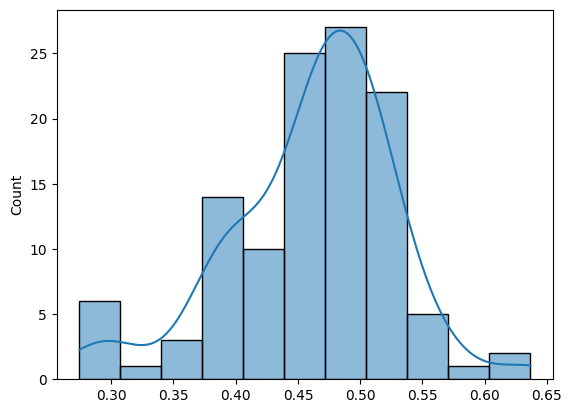

In [13]:
import seaborn as sns
props=  skimage.measure.regionprops_table(mask,fluor, properties=['label', 'area', 'intensity_mean'])

sns.histplot(props['intensity_mean'], kde=True)
